In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the dataset - sklearn california housing dataset

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
california = fetch_california_housing()


In [6]:
type(california)
# Gives bunch as type which means Container object exposing keys as attributes.

#Bunch objects are sometimes used as an output for functions and methods.
#They extend dictionaries by enabling values to be accessed by key


sklearn.utils._bunch.Bunch

In [7]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
#Checking the description of the dataset. 
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [10]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [11]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Prepare the dataset

In [12]:
cdf = pd.DataFrame(california.data,columns=california.feature_names)

In [13]:
cdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
cdf['Price']=california.target

In [15]:
cdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
# Summarize the statistics of the data
cdf.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [18]:
#Check missing values
cdf.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [19]:
#Exploratory Data Analysis
#Since we are performing regression, we use corr() method to find the correlation between the variables/features
cdf.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


#### The default correlation method in this corr() function is - PEARSON correlation
This correlation method gives output between -1 and +1. It gives the correlation between features based on highly positive, negative correlation. 

Here we have to check two different types of correlation in any given problem. <br>
One is correlation between two independent features. <br>
The other is between one independent and one dependent feature. <br>
If there is high correlation between independent features, we can remove one of the independent feature because <br>
it is called as multi-collinearity. <br>
<br><br>
The other correlation we need to focus is the relation between independent feature and output. <br>


In [20]:
import seaborn as sns
sns.pairplot(cdf)

ModuleNotFoundError: No module named 'seaborn'

Text(0, 0.5, 'Price')

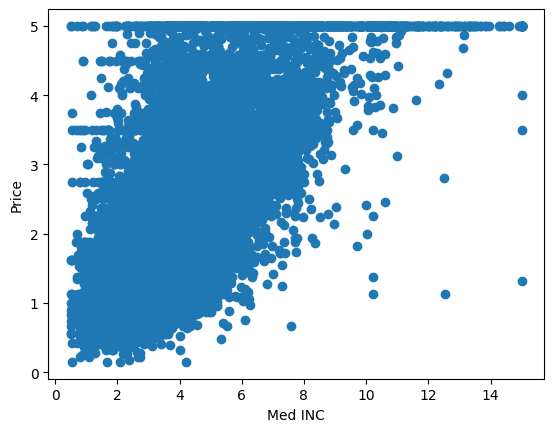

In [21]:
plt.scatter(cdf['MedInc'],cdf['Price'])
plt.xlabel('Med INC')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

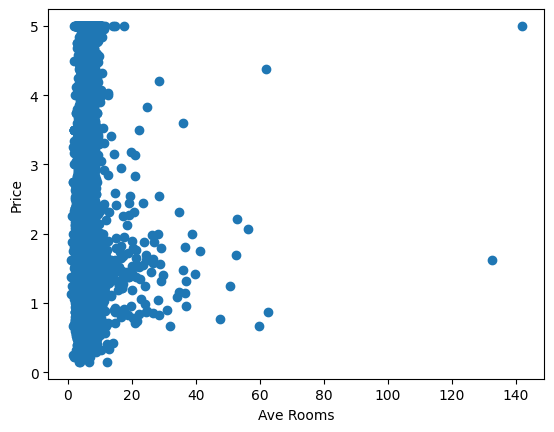

In [22]:
plt.scatter(cdf['AveRooms'],cdf['Price'])
plt.xlabel('Ave Rooms')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

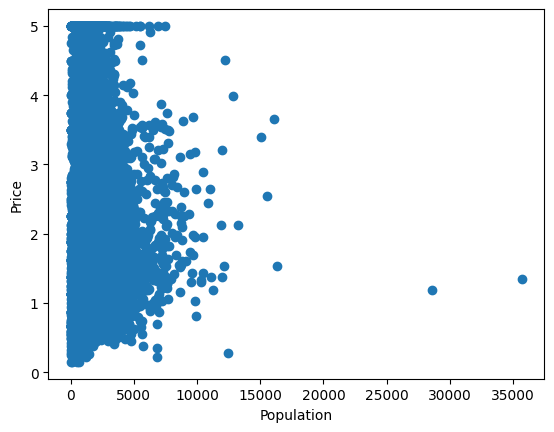

In [23]:
plt.scatter(cdf['Population'],cdf['Price'])
plt.xlabel('Population')
plt.ylabel('Price')

In [24]:
sns.regplot(x='MedInc',y='Price',data=cdf)

NameError: name 'sns' is not defined

In [25]:
#independent and dependent features
x = cdf.iloc[:,:-1]
y = cdf.iloc[:,-1]

In [26]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [28]:
## Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)

In [29]:
x_test=scaler.transform(x_test) 
#We do not write fit_transform for test dataset because whatever we applied for train, we want to be applied for test. 
# So mentioning only transform would suffice the task. 


In [30]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

## Train the Model

In [31]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)


LinearRegression()

In [32]:
#Print the coefficients and the intercept. 
#For regression problems, we find the regression plane. regression plane mathematically represented has a linear formula
#with coefficients and intercepts. For example, y = mx+c where Y is the dependent variable on X, m is the coefficient and c is 
#intercept. 
print(regression.coef_)

[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


In [33]:
## To find the parameters that were used for training the regression model
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [34]:
#Prediction of the model with test data
reg_pred=regression.predict(x_test)
reg_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

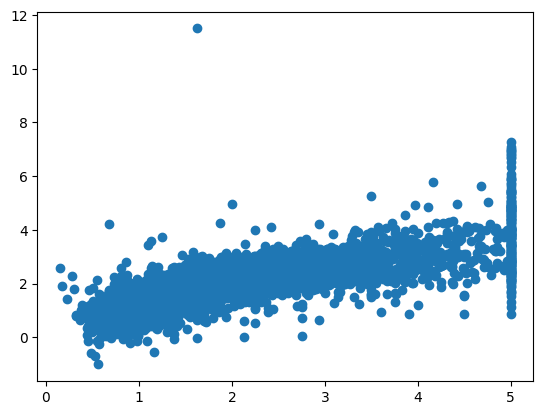

In [35]:
plt.scatter(y_test,reg_pred)

There is a fixed way of telling the relation between y_test and reg_pred
The data is not scattered like other plots. <br>
The data distribution shows significant relation between y_test and reg_pred. <br>
Inversely proportional. <br>
There are few points away which are probably outliers <br>
<br>
##### Important observation:<br>
If the data points are uniformly distributed / scattered largely in the plot, then a single line cannot  <br>
determine the prediction of the data. <br>

In [36]:
#Prediction with respect to residuals. 
#Residuals means - error w.r.to y_test and regression predicition. 
residual = y_test-reg_pred
residual

20046   -0.242123
3024    -1.306017
15663    2.290351
20484   -0.652926
9814     0.175343
           ...   
15362    0.641254
16623    0.418161
18086    0.531240
2144    -0.464511
3665    -0.494403
Name: Price, Length: 4128, dtype: float64

In [37]:
#plot the residuals. 
sns.displot(residual,kind='kde')

NameError: name 'sns' is not defined

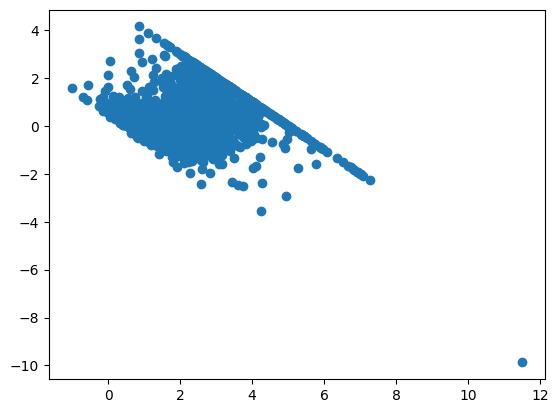

In [38]:
#Scatter plot w.r.to residuals and predictions. 
plt.scatter(reg_pred,residual)

### Performance Metrics

In [39]:
from sklearn.metrics import mean_squared_error, roc_curve, mean_absolute_error, f1_score
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5332001304956565
0.5558915986952442
0.7455813830127763


#### R-square and Adjusted R-square


##### Rsquare = (1 - SSR/SST) 
##### SSR -> Sum of squared residuals. 
##### SSt -> Total sum of squares. 
##### Adjusted R square = 1 - [(1-R^2)*(n-1)/(n-k-1)] 
where R^2 is the R square of the model <br>
n = The number of observations <br>
k = The number of predicted variables <br>

In [40]:
from sklearn.metrics import r2_score
r2_score= r2_score(y_test,reg_pred)
print(r2_score)

0.575787706032451


In [41]:
#Adjusted R square.
adj_r2 = 1 - (1-r2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(adj_r2)

0.574963792861356


### Predict New data 
From the model built above using Linear Regression, we are trying to predict for an entirely new data. <br>

In [42]:
california.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [43]:
regression.predict(california.data[0].reshape(1,-1))

array([83.99805809])

##### Mistake made above: 
One mistake we made here, we are prone to get negative values too for some input data. <br>
We should standardize before finding the prediction to get only positive values. <br>


In [44]:
#transformation of new data using the scaler object created above using Standard Scaler.
scaler.transform(california.data[0].reshape(1,-1))



c:\Aishwarya\Projects\California_house_pricing\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33397811,  0.98330419,  0.64880421, -0.1682248 , -0.97135592,
        -0.04676   ,  1.04692041, -1.32016306]])

In [45]:
regression.predict(scaler.transform(california.data[0].reshape(1,-1)))

c:\Aishwarya\Projects\California_house_pricing\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.15194269])

### Pickle the model file for DEPLOYMENT

In [46]:
### To Deploy the model we use Pickle library from python. 

In [47]:
import pickle 
pickle.dump(regression,open('regmodel.pkl','wb'))
#Basically what happens with the above code is - All the content of the object is written to the regmodel.pkl file in write byte mode
#The pickle file is a serialized format file. It can be deployed in any server and prediction can be done easily. 

In [48]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [49]:
#Prediction using pickled model. Object stored in pickle is called and the prediction is done. 
pickled_model.predict(scaler.transform(california.data[0].reshape(1,-1)))

c:\Aishwarya\Projects\California_house_pricing\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.15194269])